In [1]:
%load_ext watermark
%watermark

2018-02-27T20:48:11+01:00

CPython 3.6.4
IPython 6.2.1

compiler   : GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
system     : Linux
release    : 4.13.0-32-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [62]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)

# Descenso del gradiente

En primer lugar vamos a ver el algoritmo de descenso de gradiente "básico".

Supongamos la función $$f(x)=x^2 - 2x + 4$$ de la que queremos encontrar su mínimo.

In [63]:
f = lambda x: x**2 - 2*x + 4 

In [64]:
f(3)

7

En primer lugar calculamos su derivada:

In [65]:
f_prima = lambda x: 2*x - 2

In [66]:
f_prima(3)

4

Definimos el tamaño de paso (también llamado ratio de aprendizaje) para modificar el mínimo en cada iteración.

In [67]:
STEP_SIZE = 0.02

Definimos el algoritmo del descenso de gradiente.

$$\theta_{i} = \theta_{i-1} - \alpha*\nabla(J(\theta_{i-1}))$$


In [68]:
def descenso_gradiente(x):
    return x - STEP_SIZE*(f_prima(x))

Ahora para un mínimo local elegido al azar podemos *"mejorarlo"* aplicando el descenso de gradiente

In [69]:
x0 = 3

descenso_gradiente(x0)

2.92

Ahora podemos aplicar el algoritmo de forma iterativa

In [70]:
minimo_iteraciones = []
N_ITERACIONES = 100

x = 3
for i in range(N_ITERACIONES):
    minimo_iteraciones.append(x)
    x = descenso_gradiente(x)

In [76]:
plt.rcParams["figure.figsize"] = (6, 6)

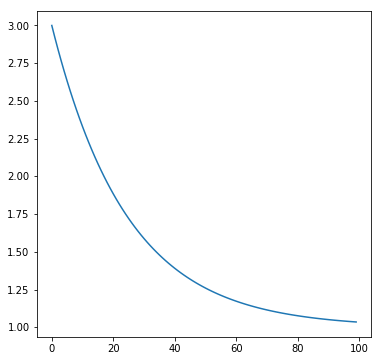

In [77]:
plt.plot(minimo_iteraciones);

Vemos que converge al mínimo de la función.

# Batch Gradient Descent

Cargamos los datos, en esta ocasión vamos a usar una función de `sklearn` llamada [make_regresion](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression) que genera un dataset sintético creado mediante una regresión lineal.

In [78]:
from sklearn.datasets import make_regression

In [79]:
n_muestras = 1000
n_variables = 2

In [80]:
make_regression?

In [81]:
X, y, coeficientes_objetivo = make_regression(n_samples=n_muestras,
                                              n_features=n_variables,
                                              coef=True)

Lo bueno de usar este dataset es que sabemos exactamente cuales son los coeficientes $\beta_i$ que definen el modelo lineal que genera la variable objetivo

In [82]:
coeficientes_objetivo

array([ 8.11662921, 79.75136408])

Podemos obtener la variable objetivo mediante un producto escalar de los pesos con las variables independientes

In [83]:
def predecir_batch(coeficientes, X):
    return coeficientes @ X.T

In [84]:
y_predicciones = predecir_batch(coeficientes_objetivo, X)
y_predicciones[:10]

array([  24.09719033,   13.60495876,   66.47819566,  -52.1898152 ,
         28.70924377,   81.10730333, -127.5952866 ,   69.92437997,
        -26.88602468,    2.81864576])

Comprobamos que dichas predicciones son exactamente iguales que la variable objetivo

In [85]:
y_predicciones[:10]-y[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Necesitamos una función de error, en este caso usaremos el **Error Cuadrático Medio** dividido entre 2, para que su derivada no tenga el 2

In [86]:
def error_batch(y_pred, y_true):
    m = y_pred.shape[0]
    return (np.sum(y_pred - y_true)**2)/2*m

También necesitamos la derivada de la función de error.

In [87]:
def derivada_error_batch(y_pred, y_true, x):
    m = y_pred.shape[0]
    return np.sum((y_pred - y_true)*x/m)

Para empezar el proceso generamos los coeficientes iniciales al azar

In [88]:
coeficientes = np.random.random((X.shape[1],))
coeficientes

array([0.68808402, 0.63838725])

In [89]:
coeficientes_objetivo

array([ 8.11662921, 79.75136408])

Ahora podemos predecir y calcular el error y la derivada del error

In [90]:
y_pred = predecir_batch(coeficientes, X)

In [91]:
error_batch(y_pred, y)

1314193738.245028

In [94]:
derivada_error_batch(y_pred, y, X[:,0])

-9.926389220280852

ya tenemos todo para implementar el descenso de gradiente batch

In [95]:
def descenso_gradiente_batch(coeficientes, X, y):
    y_predicciones = predecir_batch(coeficientes, X)
    for i in range(coeficientes.shape[0]):
        coeficientes[i] = coeficientes[i]- STEP_SIZE * derivada_error_batch(y_predicciones, y, X[:,i])
    error = error_batch(y_predicciones, y)
    return coeficientes, error


Simplemente definimos un número de iteraciones y un tamaño de paso (tambien llamado **ratio de aprendizaje o learning rate**), iteraremos y en cada iteración modificaremos los parámetros del modelo en función del tamaño de paso.

In [96]:
coeficientes_iteraciones = []
error_iteraciones = []

N_ITERACIONES = 200
STEP_SIZE = 0.02
coeficientes = np.random.random((X.shape[1],))
error = error_batch(coeficientes, X)
for i in range(N_ITERACIONES):
    coeficientes_iteraciones.append(coeficientes.copy())
    error_iteraciones.append(error)
    coeficientes, error = descenso_gradiente_batch(coeficientes, X, y)

coeficientes_iteraciones = np.array(coeficientes_iteraciones)

In [97]:
coeficientes

array([ 8.15663351, 78.48834352])

Vemos que los coeficientes obtenidos se parecen mucho a los coeficientes objetivo.

In [98]:
coeficientes_objetivo

array([ 8.11662921, 79.75136408])

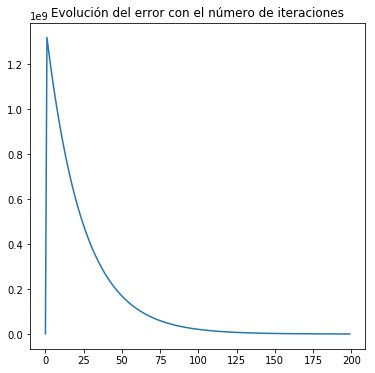

In [99]:
plt.plot(error_iteraciones)
plt.title("Evolución del error con el número de iteraciones");

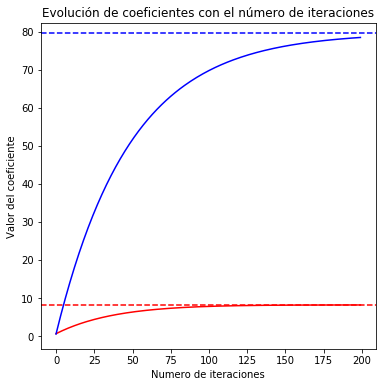

In [100]:
plt.plot(coeficientes_iteraciones[:,0], color="red")
plt.axhline(coeficientes_objetivo[0], color="red", linestyle="dashed")

plt.plot(coeficientes_iteraciones[:,1], color="blue")
plt.axhline(coeficientes_objetivo[1], color="blue", linestyle="dashed")

plt.xlabel("Numero de iteraciones")
plt.ylabel("Valor del coeficiente")

plt.title("Evolución de coeficientes con el número de iteraciones");

# Descenso de gradiente estocástico (SGD)

In [101]:
def predecir_observacion(coeficientes, x):
    return coeficientes @ x.T

In [103]:
X[0]

array([0.73208036, 0.22764708])

In [118]:
predecir_observacion(coeficientes, X[0])

24.09719035334344

In [107]:
def derivada_error_observacion(y_pred, y_true, x):
    return (y_pred - y_true) * x

In [122]:
derivada_error_observacion(
    predecir_observacion(coeficientes, X[0]), y[0], X[0])

array([2.06551468e-08, 6.42290682e-09])

la definición de la iteracion de sgd es similar a la de batch, simplemente usando el error de observación en vez de el error total

In [123]:
def descenso_gradiente_estocastico(coeficientes, x, y):
    y_predicciones = predecir_observacion(coeficientes, x)
    for i in range(coeficientes.shape[0]):
        coeficientes[i] = coeficientes[i]- STEP_SIZE * derivada_error_observacion(y_predicciones, y, x[i])
    return coeficientes

Ahora hacemos solo una iteración (podriamos hacer más), pero la iteramos para cada observación individual.

In [176]:
coeficientes_iteraciones = []
error_iteraciones = []

STEP_SIZE = 0.02
coeficientes = np.random.random((X.shape[1],))
error = error_batch(coeficientes, X)

indice_aleatorio = np.random.permutation(X.shape[0])
for i in indice_aleatorio:
    error_iteraciones.append(error)
    coeficientes_iteraciones.append(coeficientes.copy())
    
    x_iteracion = X[i]
    y_iteracion = y[i]
    coeficientes = descenso_gradiente_estocastico(coeficientes,
                                                  x_iteracion,
                                                  y_iteracion)
    y_predicciones = predecir_batch(coeficientes, X)
    error = error_batch(y_predicciones, y)
    
coeficientes_iteraciones = np.array(coeficientes_iteraciones)

In [177]:
coeficientes

array([ 8.11662923, 79.75136403])

In [169]:
coeficientes_objetivo

array([ 8.11662921, 79.75136408])

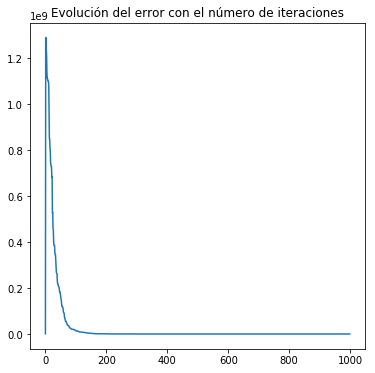

In [178]:
plt.plot(error_iteraciones)
plt.title("Evolución del error con el número de iteraciones");

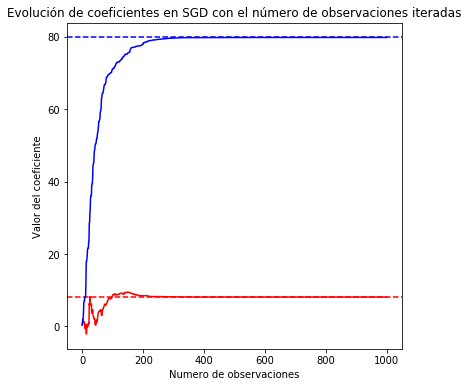

In [179]:
plt.plot(coeficientes_iteraciones[:,0], color="red")
plt.axhline(coeficientes_objetivo[0], color="red", linestyle="dashed")

plt.plot(coeficientes_iteraciones[:,1], color="blue")
plt.axhline(coeficientes_objetivo[1], color="blue", linestyle="dashed")

plt.xlabel("Numero de observaciones")
plt.ylabel("Valor del coeficiente")

plt.title("Evolución de coeficientes en SGD con el número de observaciones iteradas");

### SGD en scikit-learn

Scikit-learn tiene estimadores para regresión y clasificación basados en SGD, [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor) y [SGDClassifier](from sklearn.linear_model import SGDClassifier)

Los parámetros más importantes para estos estimadores son:

- **loss**: La función de pérdidas a utilizar
- **learning_rate**: El tamaño de paso, también llamado learning rate (ratio de aprendizaje)
- **max_iter**: Número de iteraciones (también llamadas épocas)

In [180]:
from sklearn.linear_model import SGDClassifier, SGDRegressor

In [181]:
estimador_sgd = SGDRegressor(max_iter=10)
estimador_sgd.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [182]:
estimador_sgd.predict(X)[:10]

array([  24.09486821,   13.60342495,   66.47155256,  -52.18488054,
         28.70621441,   81.0994595 , -127.58282514,   69.91733201,
        -26.88328172,    2.81844695])

Podemos ver los coeficientes que produce el estimador

In [183]:
estimador_sgd.coef_

array([ 8.11605666, 79.74350833])

Y vemos que son muy similares a los coeficientes objetivo

In [184]:
coeficientes_objetivo

array([ 8.11662921, 79.75136408])

Y por supuesto, podemos hacer validación cruzada como con cualquier estimador de `sklearn`

In [185]:
from sklearn.model_selection import cross_val_score

cross_val_score(SGDRegressor(max_iter=10), X, y, 
                scoring="neg_mean_squared_error")

array([-9.58351665e-05, -1.20224267e-04, -2.44092724e-04])